# Kernel Density Estimates for MNIST Recognition
We use two methods to estimate the distribution over images for each handwritten number. We first use an approach that compares each number to the mean image of each class, and choose its nearest class neighbor. We then estimate the mean of each number using Gaussians centered at each pixel to allow for variance in our observation, and see a marked improvement in performance.

In [0]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_data = train_data/255
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_data = test_data/255
test_labels = test_mat['t10k_labels']


NUMBER_OF_CLASSES = 10
NUMBER_OF_PIXELS = 784
k = NUMBER_OF_PIXELS #k is the dimension of vector x and is used in the calculation of the Gaussian

train_labels = np.reshape(train_labels, (60000))
test_labels = np.reshape(test_labels, (10000))

def confusionMatrix (pred_labels, test_labels, method):
    matrix = np.zeros((10, 10), dtype='int')
    for i in range(len(pred_labels)):
        matrix[pred_labels[i]][test_labels[i]] += 1
    fig2, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax = sns.heatmap(matrix)
    ax.set_ylabel("Predicted Class")
    ax.set_xlabel("True Class")
    if (method == "simple_method"):
        ax.set_title("Confusion matrix using class means")
    else:
        ax.set_title("Confusion matrix using all elements of classes")

def averageNum (train_data, train_labels):
    average_images = np.zeros((NUMBER_OF_CLASSES, NUMBER_OF_PIXELS))
    for i in range ((NUMBER_OF_CLASSES)):
        filtered = np.mean(train_data[:,train_labels == i], axis=1)
        average_images[i] = filtered
        
    f, axarr = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
    
    axarr[0,0].imshow(average_images[0].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[0,1].imshow(average_images[1].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[0,2].imshow(average_images[2].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[0,3].imshow(average_images[3].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[0,4].imshow(average_images[4].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[1,0].imshow(average_images[5].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[1,1].imshow(average_images[6].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[1,2].imshow(average_images[7].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[1,3].imshow(average_images[8].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    axarr[1,4].imshow(average_images[9].reshape(28,28).T, interpolation='nearest', cmap="inferno")
    for i in range(2):
        for j in range(5):
            axarr[i,j].grid(False)
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
    plt.show
    
    return average_images
        
def simpleClassify (test_data, test_labels, average_images):
    pred_labels = np.empty(len(test_labels), dtype='object')
    score = np.zeros(10, dtype=float)
    for j in range(len(test_labels)):
        for i in range(NUMBER_OF_CLASSES):
            score[i]= (2*np.pi)**(-k/2)*np.exp(.5*(np.dot((test_data[:, j] - average_images[i, :]),(test_data[:, j] - average_images[i, :]))))
        pred_labels[j] = (np.argmin(score))
    percent = np.sum(np.array(test_labels) == pred_labels)/len(test_labels)*100
    
    print("Simple Classification Rate :", percent, "%", "Percent Error :", 100 - percent, "%")

    return pred_labels

        
def complexClassify (train_data, test_data, train_labels, test_labels):
    pred_labels = np.empty((1000))
    
    x_squared = (np.sum((test_data[:,0:1000]*test_data[:,0:1000]), axis=0, keepdims = True))
    two_x_mu = 2*np.dot(test_data[:,0:1000].T,train_data) #dot is actually a matrix product
    mu_squared = (np.sum((train_data * train_data), axis=0, keepdims = True))
    
    prob = (2*np.pi)**(-k/2)*np.exp(-.5*(x_squared.T - two_x_mu + mu_squared))
    
    for i in range(1000):
        pred_labels[i] = train_labels[np.argmax(prob[i,:])]
    
    count = 0
    for i in range(1000):
        if (pred_labels[i] == test_labels[i]):
            count += 1
    correct = count/1000*100
    error = ((1000-count)/1000*100)
    print("Complex Classification Rate :", correct, "%", "Percent Error :", error, "%")
    
    pred_labels = pred_labels.astype(int)
    
    return pred_labels



Simple Classification Rate : 82.03 % Percent Error : 17.97 %
Complex Classification Rate : 96.2 % Percent Error : 3.8 %


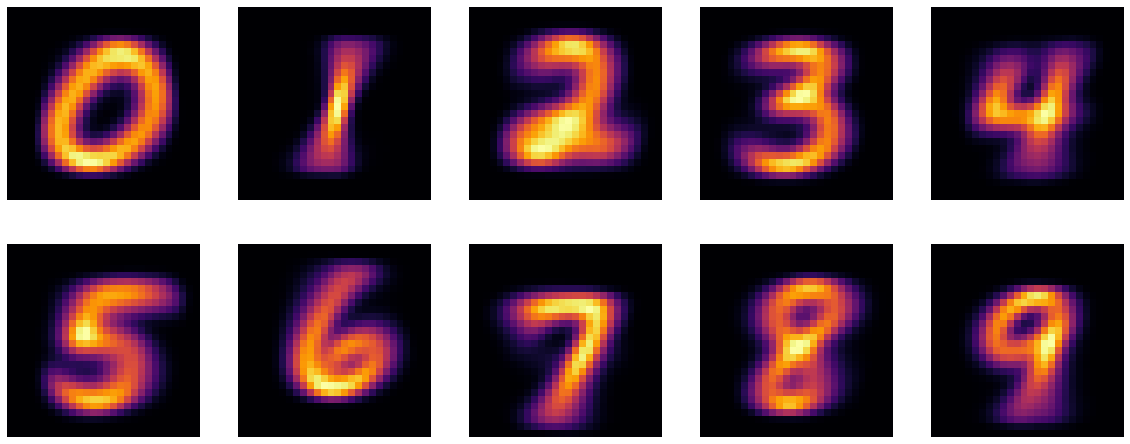

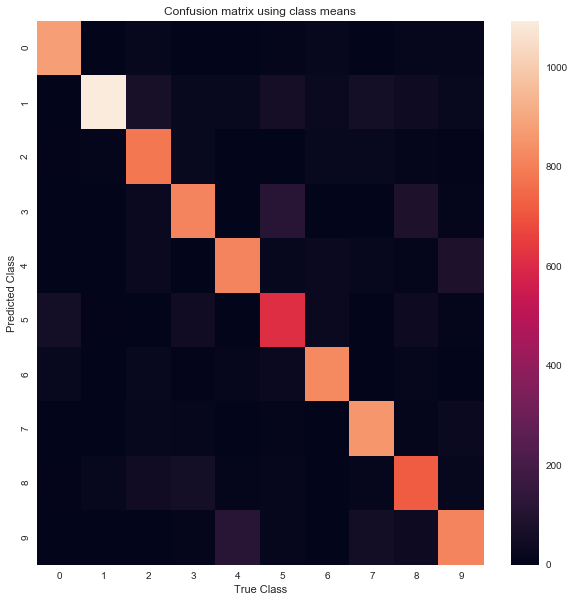

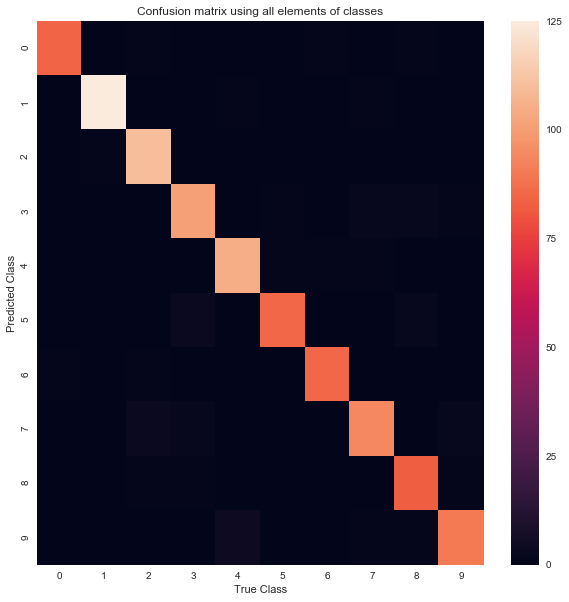

In [0]:
average_images = averageNum(train_data, train_labels)
pred_labels1 = simpleClassify(test_data, test_labels, average_images)
confusionMatrix(pred_labels1, test_labels, "simple_method")
pred_labels2 = complexClassify(train_data, test_data, train_labels, test_labels)
confusionMatrix(pred_labels2, test_labels, "complex_method")

# 1 - Visualization of Average Images for each class - Generate an "average" image using a gaussian to represent each pixel and adding all images together.

# 2 - Simple Classifier

# 3 - Complex Classifier